In [208]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import itertools
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, classification_report, jaccard_score
from scipy.optimize import curve_fit
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import fcluster
import scipy
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

pylab.rcParams['figure.figsize'] = (10,5)

# Machine Learning with Python

Machine learning is a subset of the field of artificial intelligence that seeks to create computer systems that effectively perform specified tasks without explicit human instruction. It is a heavily data-driven application that is based on the scientific study of algorithms and statistical models.

There are a variety of machine learning techniques, including:

* Regression/Estimation: predicting continuous variables
* Classification: predicting binary outcomes
* Clustering: finding/summarizing similar data
* Associations: linking frequent co-occurrences
* Anomaly Detection: identifying outliers
* Sequence Mining: predicting next events
* Dimension Reduction: reducing the number of random variables (ex: PCA)
* Recommendation Systems: suggesting items based on historical preferences

## Supervised vs. Unsupervised Learning

Supervised models are "taught" in a controlled environment using historical labeled datasets with the goal of predicting future outcomes. When viewing a labeled dataset, column headers are referred to as "attributes", while column themselves are referred to as "features". Data in any one cell in a column can be either numeric or categorical. Finally, each row, or observation, corresponds to a single occurrence posessing all of the attributes. The two main types of supervised learning techniques are classification and regression.

Unsupervised models independently discover relevant information using an unlabeled dataset. These algorithms tend to be more complex, have fewer evaluation methods and operate in a less controlled environment. Common methods include dimension reduction, density estimation, market basket analysis and clustering.


### Regression

Regression models can be classified based on a) the number of independent variables and b) the nature of the relationship between independent and dependent variables:

* **Simple Regression** (1 independent variable): $\hat{y} = \theta_0 + \theta_{1}x_1$
    * Simple Linear Regression
    * Simple Non-Linear Regression
* **Multiple Regression** (>1 independent variables): $\hat{y} = \theta_0 + \theta_{1}x_1 + \theta_{2}x_2\;+\; ... +\;\theta_{n}x_n = \theta^TX$ (a hyperplane)
    * Multiple Linear Regression
    * Multiple Non-Linear Regression
    
For simple regression, it is easy to calculate the optimum $\theta$ values either formulaically or via optimization. Computation becomes more difficult and resource intensive for multiple regression. Although linear algebra operations can be applied to smaller datasets, an optimization approach such as gradient descent, stochastic gradient descent or Newton's method should be used when the number of rows exceeds 10k or when performing multiple linear regression.

Linear regression has many benefits. For one, it's fast and easy to understand. It also does not require the tuning of parameters. However, there are many other types of regression algorithms, including:

* Ordinal regression
* Poisson regression
* Fast forest quantile regression
* Linear, polynomial, lasso, stepwise, ridge regression
* Bayesian linear regression
* Neural network regression
* Decision forest regression
* Boosted decision tree regression
* KNN (K-nearest neighbors)

The fundamental compromise of fitting regression models is the trade-off between training accuracy and out-of-sample accuracy. Although it is desirable to use all data available when training a model, training and testing using the same dataset has its drawbacks. Typically, this method results in high training accuracy but tends to "over-fit" the data, capturing noise rather than the underlying process. Thus, when applied to new data, these non-generalized models can be highly inaccurate.

Train/test split provides a more accurate evaluation of out-of-sample data. Models are trained and tested on mutually exclusive segments of the dataset. Unfortunatley this method also has its drawbacks, including being highly dependent on which segments are chosen as training vs. test data. Happily, K-fold cross-validation minimizes many of the shortcomings of the train/test split method. In this technique, results from multiple iterations of train/test splits are averaged to produce a more consistent out-of-sample accuracy.

**Model evaluation metrics** are used to assess fit and hone models. In this context, error refers to the difference between actual and predicted values. There are several different ways to calculate the error of a model:

* Mean Absolute Error: $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$ *\*easiest to understand*
* Mean Squared Error: $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$ *\*geared towards larger errors*
* Root Mean Squared Error: $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$ *\*interpretable in the same units as the response variable*
* Relative Absolute Error aka Residual Sum of Squares: $RAE = \frac{\sum_{i=1}^{n}|y_i-\hat{y}_i|}{\sum_{i=1}^{n}|y_i-\bar{y}_i|}$ *\*normalizes total absolute error by dividing by total absolute error*
* Relative Squared Error: $RSE = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y}_i)^2}$ *\*used to calculate $R^2$*
* Coefficient of Determination aka $R^2$: $R^2 = 1 - RSE$

In [4]:
# Load dataset
df = pd.read_csv("assets/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Extract relevant variables
car_df = df[["CYLINDERS", "ENGINESIZE", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
car_df.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244


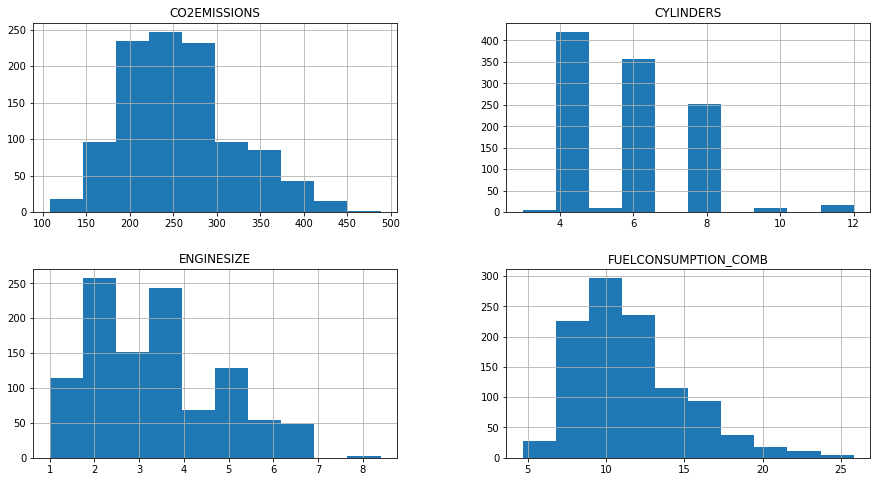

In [6]:
# Visualize variables
car_df.hist(figsize=(15,8))
plt.show()

In [7]:
# Create train/test split - Method 1
mask = np.random.rand(len(car_df)) < 0.8
train = car_df[mask] # 80% for training
test = car_df[~mask] # 20% for testing

print("Number of training samples:", train.shape[0])
print("Number of testing samples:", test.shape[0])

Number of training samples: 852
Number of testing samples: 215


In [8]:
# Create train/test split - Method 2
y = car_df["CO2EMISSIONS"]
x = car_df.drop("CO2EMISSIONS", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # The benefit is that with random_state, groups are fixed

print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

Number of training samples: 853
Number of testing samples: 214


#### Fit a Simple Linear Regression Model

Simple linear regression models attempt to fit a line to a dataset that represents a fundamentally linear signal (plus noise).

Estimated Linear Model Paramters => Intercept: 3.09 | 5.00


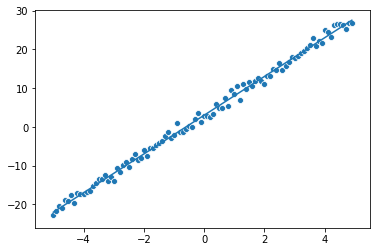

In [9]:
slope = 5
intercept = 3

x = np.arange(-5, 5, 0.1)
y = intercept + slope * x
y_noise = np.random.normal(size=x.size)
ydata = y + y_noise

sns.lineplot(x, y) # Underlying signal
sns.scatterplot(x, ydata) # Noise

lm = LinearRegression()
lm.fit(x.reshape(-1, 1), ydata)
print("Estimated Linear Model Paramters => Intercept: {:0.2f} | {:0.2f}".format(lm.intercept_, lm.coef_[0]))

In [10]:
# Train model - Method 1
lm = LinearRegression()
lm.fit(train[["ENGINESIZE"]], train["CO2EMISSIONS"])
print("Coefficient:", lm.coef_, "Intercept:", lm.intercept_)

Coefficient: [39.30478079] Intercept: 124.04490165689162


In [11]:
# Train model - Method 1
lm = LinearRegression()
lm.fit(x_train[["ENGINESIZE"]], y_train)
print("Coefficient:", lm.coef_, "Intercept:", lm.intercept_)

Coefficient: [39.24838431] Intercept: 126.1892015472493


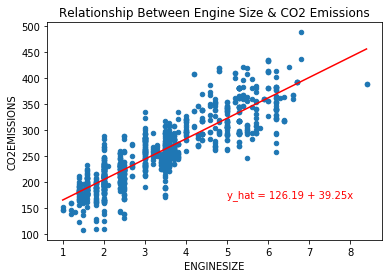

In [12]:
# Plot regression line
car_df.plot(kind="scatter", x="ENGINESIZE", y="CO2EMISSIONS")
x_min = car_df["ENGINESIZE"].min()
x_max = car_df["ENGINESIZE"].max()
x_range = np.linspace(x_min, x_max, 1000)
plt.plot(x_range, lm.intercept_ + lm.coef_[0] * x_range, color='r')
label = "y_hat = " + str(round(lm.intercept_,2)) + " + " + str(round(lm.coef_[0],2)) + "x"
plt.annotate(label, xy=(5, 170), color='r')

plt.title("Relationship Between Engine Size & CO2 Emissions")
plt.show()

In [13]:
# Evaluate regression model
y_hat = lm.predict(x_test[["ENGINESIZE"]])
r2 = lm.score(x_test[["ENGINESIZE"]], y_test) # Note this takes as input test x and test y
r2_v2 = r2_score(y_test, y_hat) # Note this takes as input the test y and the predicted y

mse = mean_squared_error(y_test, y_hat)

print("Two ways to calculate R2: {:0.2f}, {:0.2f}".format(r2, r2_v2))
print("MSE:", mse)

Two ways to calculate R2: 0.72, 0.72
MSE: 1181.528809303555


#### Fit a Multiple Linear Regression Model

As with simple linear regression, multiple linear regression involves estimating the intercept and coefficient of each indenpendent variable. Rather than define a line, however, these parameters define the hyperplane of best fit.

In [14]:
features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
lm = LinearRegression()
lm.fit(x_train[features], y_train)
print("Coefficient:", lm.coef_, "Intercept:", lm.intercept_)

Coefficient: [11.98993058  7.54469599  8.98695981] Intercept: 69.05220992553777


In [15]:
y_hat = lm.predict(x_test[features])
r2 = r2_score(y_test.array, y_hat)

mse = mean_squared_error(y_test, y_hat)

print("R2: {:0.2f}".format(r2))
print("MSE: {:0.2f}".format(mse))

R2: 0.86
MSE: 589.24


#### Fit a Polynomial Regression Model

Polynomial regression involves fitting a model in the form of an nth degree polynomial: $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2^2 + ... + \theta_nx_n^n$. This is done using a Scikit-learn method called ```fit_transform()```, which derives a new feature set from the existing feature set and, in doing so, reduces the problem to one involving simple linear regression. The number of features that are generated depend on the degree of the polynomial; for example, transforming a third degree polynomial would require 4 sets of features.

A residual plot is an easy way to visualize the relationship between variables. Residuals that vary along the x axis indicate a measure of non-linearity.

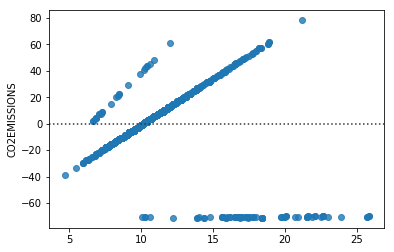

In [16]:
sns.residplot(x_train[['FUELCONSUMPTION_COMB']], y_train)
plt.show()

In [17]:
poly = PolynomialFeatures(degree=3)
x_train_trans = poly.fit_transform(x_train[['FUELCONSUMPTION_COMB']])
x_test_trans = poly.fit_transform(x_test[['FUELCONSUMPTION_COMB']])

lm = LinearRegression()
lm.fit(x_train_trans, y_train)

y_hat = lm.predict(x_test_trans)
print("MSE: ", mean_squared_error(y_test, y_hat))
print("R2: ", r2_score(y_test, y_hat))

MSE:  469.1296167212955
R2:  0.8888709628290828


#### Fit a Non-Linear Regression Model

First, visualize the data to determine whether a non-linear model might be appropriate.

In [18]:
df = pd.read_csv("assets/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


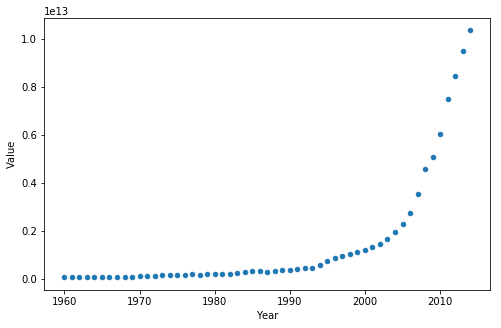

In [19]:
df.plot(kind="scatter", x="Year", y="Value", figsize=(8,5))
plt.show()

This plot indicates indicates a non-linear relationship between variables and resembles (somewhat) a sigmoid/logistic function of the form: $\hat{y} = \frac{1}{1 + e^{\beta_1(X-\beta_2)}}$. We can define a logistic function and then use Scikit-learn's ```curve_fit()``` method to determine the optimal model parameters that minimize the sum of the squared residuals of ```f(x, *popt) - y```.

In [20]:
def logistic(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1*(x - beta_2)))
    return y

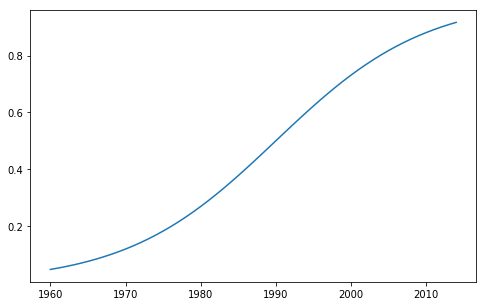

In [21]:
beta_1 = 0.10
beta_2 = 1990.0

y = logistic(df["Year"], beta_1, beta_2)

plt.figure(figsize=(8,5))
plt.plot(df["Year"], y)
plt.show()

In [22]:
# Normalize data
x_norm = df["Year"]/df["Year"].max()
y_norm = df["Value"]/df["Value"].max()

In [23]:
# Fit to logistic model
popt, pcov = curve_fit(logistic, x_norm, y_norm) # Returns the optimal parameters and their covariance
print("Optimal parameters:", popt)

Optimal parameters: [690.4530181    0.99720713]


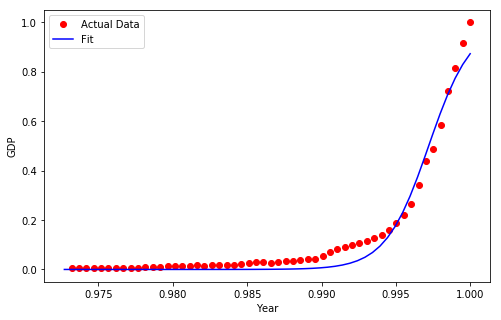

In [24]:
# Plot the model
x_range = np.linspace(1960, 2015, 55)
x_range = x_range/max(x_range)

y_hat = logistic(x_range, *popt)

plt.figure(figsize=(8,5))
plt.plot(x_norm, y_norm, 'ro', label="Actual Data")
plt.plot(x_range, y_hat, 'b', label="Fit")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [25]:
# Calculate the accuracy of the model
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)

popt, pcov = curve_fit(logistic, x_train, y_train)

y_hat = logistic(x_test, *popt)

print("R2: {:0.2f}".format(r2_score(y_test, y_hat)))

R2: 0.86


### Classification

Classification is a supervised learning approach where the target a categorical variable with discrete values. In the simplest case, the model outputs a binary prediction of ```0``` or ```1```; in the more sophisticated case, a multi-class classifier predicts outputs within a set of discrete values, such as ```["DrugA","DrugB","DrugC"]```.

Classification has many practical uses include handwriting recognition, spam detection and document classification. Types of algorithms include:

* Decision Trees
* Naive Bayes
* Linear Discriminant Analysis
* K-Nearest Neighbor

* Logistic Regression
* Neural Networks
* Support Vector Machines (SVM)

#### K-Nearest Neighbor

KNN is an algorithm that utlizes a consensus-based approach to classification in which unknown cases are categorized based on their similarity to known cases. One way to calculate similarity is in terms of Euclidian distance, however other measures may be appropriate based on the data. The trick is to find the number of neighbors, ```k```, which produces the best predictions (when applied to test data).

KNN can also be used for regression. In this case, the predicted value is calculated as the average or median target value of the nearest neighbors (ex: averaging nearby house prices).

In [26]:
# Load dataset - target is 'custcat', a numerical categorical variable between 1-4
df = pd.read_csv("assets/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [27]:
# Determine which columns represent independent/dependent variables
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [28]:
# Convert dataframes to Numpy arrays
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [29]:
# Normalize values so that data has zero mean and unit variance
# Good practice for KNN, which is based on distance calculations
x = StandardScaler().fit(x).transform(x.astype(float))

In [30]:
# Create train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [31]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [32]:
# Predict using model
y_hat = knn.predict(x_test)
y_hat[0:5]

array([1, 1, 3, 2, 4])

In [33]:
# Evaluate accuracy
accuracy_score(y_test, y_hat)

0.32

In [34]:
# Find the optimal k
k = 10
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)
    std_acc[i-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Best accuracy achieved with 0.34 with k= 9


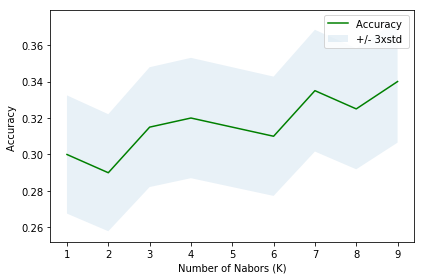

In [35]:
print("Best accuracy achieved with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#### Decision Trees

A decision tree is a classification model that embodies the hierarchical importance of data attributes. A tree-like structure of internal nodes (tests) and branches (test results) is created by iteratively identifying which attribute have the most predictiveness and information gain. The goal are pure nodes consisting of one single categorical variable (entropy = 0).

In [36]:
df = pd.read_csv("assets/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [37]:
# Extract independent/dependent variables
x = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
y = df["Drug"]

In [38]:
# Convert categorical variables into numerical variables
le_sex = LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1])

le_BP = LabelEncoder()
le_BP.fit(["LOW", "NORMAL", "HIGH"])
x[:,2] = le_BP.transform(x[:,2])

le_chol = LabelEncoder()
le_chol.fit(["NORMAL", "HIGH"])
x[:,3] = le_chol.transform(x[:,3])

In [39]:
# Create train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [40]:
# Create model
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [41]:
# Fit model
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
# Predict
y_hat = tree.predict(x_test)
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [43]:
print("Accuracy score=", accuracy_score(y_test, y_hat))

Accuracy score= 0.9833333333333333


#### Logistic Regression

Logistic regression is analogous to linear regression but seeks to predict  a categorical rather than a numerical target value. The goal is to create a model that not only predicts the class of each sample, but also returns the probability of the match and allows us to understand the impact of each independent variable on the dependent variable. It can be used for both binary and multi-class classification. 

Linearly separable datasets are prime targets for logistic regression applications; depending on the dimensionality of the problem, the decision boundary will be a line or a plane or a hyperplane. All points on one side of this boundary will belong to one class, while all those on the other side will belong to the other class. Optimal parameters are determined iteratively using gradient descent.

The general process of training a logistic regression model:

* Initialize model parameters with random values: $\theta^T = [\theta_1, \theta_2, \theta_3, ..., \theta_k]$
* Calculate the error using the cost function (on the training set): $J(\theta) = -\frac{1}{m}\sum_{i-1}^{m}y^ilog(\hat{y}^i) + (1 - y^i)log(1-\hat{y}^i)$
* Calculate the gradient of the cost function to determine how to adjust parameters to further minimize cost: $\triangledown_J = [\frac{\delta J}{\delta\theta_1}, \frac{\delta J}{\delta\theta_2}, \frac{\delta J}{\delta\theta_3},...,\frac{\delta J}{\delta\theta_k}]$
* Update parameters/weights with new values: $\theta_{new} = \theta_{old}-\eta\triangledown J$
* Iteratively calculate errors until cost is minimized.

Logistic regression fits a sigmoid ($\sigma$) or logistic function to the linear regression result, $\theta^TX$, resulting in a probability function: $P(Y=1|X) = \sigma(\theta^TX) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}$.

The **Jaccard index** or Jaccard similarity coefficient is often used to assess model accuracy. It is defined as the size of the intersection divided by the size of the union of two label sets. If predicted labels are identical to actual labels, the Jaccard index equals one.

In [44]:
# Load the dataset
churn_df = pd.read_csv("assets/ChurnData.csv")
churn_df.head() # Where churn is the target categorical variable

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [45]:
# Isolate independent/dependent variables, format data
churn_df = churn_df[["tenure", "age", "address", "income", "ed", "employ", "equip", "callcard", "wireless", "churn"]]
churn_df["churn"].astype(int)
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [46]:
# Format & transform the data
X = np.asarray(churn_df[["tenure", "age", "address", "income", "ed", "employ", "equip", "callcard", "wireless"]])
y = np.asarray(churn_df["churn"])
X_trans = StandardScaler().fit(X).transform(X)

In [47]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=4)

In [48]:
# Train the model
logm = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
logm

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Predict
y_hat = logm.predict(X_test)
y_hat_proba = logm.predict_proba(X_test)
y_hat

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1.])

#### Evaluation Methods

* Jaccard Index (1 being perfect)
* Confusion Matrix
* Classification Report
    * Precision = TP / (TP + FP)
    * Recall = TP / (TP + FN)
    * F1 Score: the harmonic average of precision and recall (1 being perfect)

In [50]:
# Calculate the Jaccard index
jaccard_score(y_test, y_hat)

0.36363636363636365

In [51]:
# Create confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


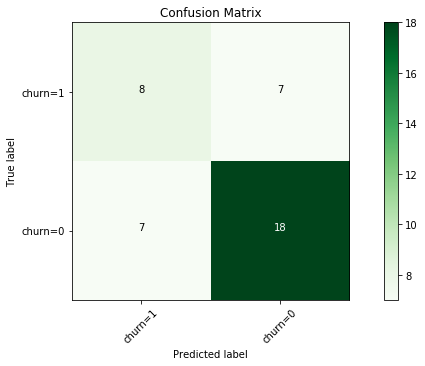

In [52]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix, classes=["churn=1", "churn=0"], normalize=False, title="Confusion Matrix")

In [53]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        25
         1.0       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



#### Support Vector Machine (SVM)

SVM classifiers seek to find the hyperplane that optimally delineates different classes of data. As most datasets are linearly inseparable, the model must first apply kernelling. This process maps data into a higher dimensional space in such a way that causes the dataset to become linearly separable. The best hyperplane is the one that maximizes the margin between support vectors (the innermost points between classes of data).

The result of SVM are the parameters that define the hyperplane boundary. Using this equation, we can calculate whether an unknown point falls into the class "above" or "below" the boundary.

While SVM is computationally efficient (as it uses only a subset of the data) and accurate in high-dimensional space, it does not provide estimation of probabilities, like logistic regression. It is also prone to over-fitting.

In [54]:
# Load data
cell_df = pd.read_csv("assets/cell_samples.csv")
cell_df.head() # Target = Class, where 2 = benign and 4 = malignant

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [55]:
cell_df["BareNuc"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [56]:
# Drop rows that contain non-numerical values
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors="coerce").notnull()]
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [57]:
# Identify independent/dependent variables
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
y = cell_df["Class"].astype("int")
y = np.asarray(y)

In [58]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [59]:
# Train SVM model
svm_model = svm.SVC(kernel="rbf")
svm_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
# Predict using test data
y_hat = svm_model.predict(X_test)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


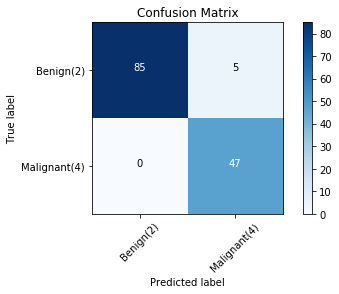

In [62]:
# Visualize results
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test, y_hat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Benign(2)", "Malignant(4)"], normalize=False, title="Confusion Matrix")

In [63]:
# Evaluate accuracy of model
f1_score(y_test, y_hat, average="weighted")

0.9639038982104676

#### Clustering

Clustering is an unsupervised process that groups similar points into "clusters" within a larger unlabeled dataset. Contrast this to classification, which makes predictions within a labeled dataset, i.e. all possible categorical outcomes are known. Clustering for segmentation enables us to partition data into mutually exclusive groups, which can then be used to targeted different consumer groups, identify fraud or auto-categorize news.

Common types of clustering algorithms include:

* Partition-based clustering:
    * Ex: k-Means, k-Median, Fuzzy c-Means
    * Efficient, used for medium/large datasets
* Hierarchical clustering:
    * Ex: Agglomerative, Divisive
    * Intuitive, used for small datasets
* Density-based clustering:
    * Ex: DB Scan
    * Produce arbitrarily shaped clusters, used for spatial or noisy data
    
**k-Means Clustering**

The k-means algorithm is a popular method for partitioning datasets into clusters.

* Initialize k centroids, one for each centroid
* Create a distance matrix containing the calculated distances from each of the n points to each of the k centroids (an n x k matrix). Euclidean distance is often the distance measure that is used.
* Assign each point its closest centroid, creating k clusters.
* Shift the location of each centroid to the mean of the clusters.
* Re-run the calculations until centroids converge.

You can then assess the accuracy of the clustering by either comparing clusters to the actual truth (if available) or by calculating the closeness of points to the centroid or mean squared error. Note, however, that as k increases, the mean distance to centroid will inevitably decrease, but this does not necessarily imply a better clustering result. Instead, we plot k vs. mean distance to centroid and identify the "elbow" point, whereby the rate of accuracy decreases sharply. This kinking point corresponds to the optimal k that should be selected.

Another key point to consider with k-means is that convergence can depend on the initial start values that are chosen for the cluster centroids. Re-running the algorithm using many initial conditions is used to verifying that the results represent a global optimum rather than just a local optimum. Luckily, this algorithm tends to be quite fast. 

Random center points: [3.11 2.38] [-4.46 -4.81] [-3.71  2.68] [-4.46 -2.77] [ 4.69 -3.95]


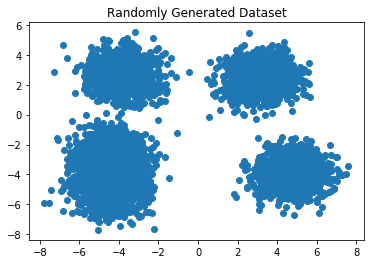

In [204]:
# Create randomly generated dataset
# np.random.seed(0) # To use the same seed state
n = 5
pts = np.random.uniform(-5, 5, size=(n,2))
print("Random center points:", *pts)
X, y = make_blobs(n_samples=5000, centers=pts, cluster_std=0.9)

# Visualize data
plt.scatter(X[:,0], X[:,1])
plt.title("Randomly Generated Dataset")
plt.show()

In [205]:
# Set up & fit k-means with the feature matrix
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [206]:
# Extract results: labeled points and cluster centers
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

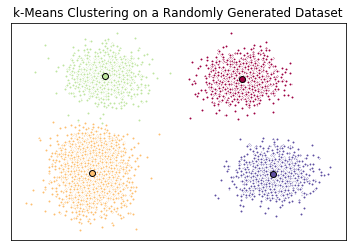

In [207]:
# Visualize the results
fig = plt.figure()
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(center_pts)), colors):
    cluster_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X[cluster_members,0], X[cluster_members,1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
ax.set_title('k-Means Clustering on a Randomly Generated Dataset')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [68]:
# Another k-means example
cust_df = pd.read_csv("assets/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [69]:
# Drop Address column because it is non-numerical
cust_df.drop(columns=["Address"], inplace=True)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [70]:
# Extract features of interest
X = cust_df.values[:,1:]
X

array([[41.  ,  2.  ,  6.  , ...,  1.07,  0.  ,  6.3 ],
       [47.  ,  1.  , 26.  , ...,  8.22,  0.  , 12.8 ],
       [33.  ,  2.  , 10.  , ...,  5.8 ,  1.  , 20.9 ],
       ...,
       [25.  ,  4.  ,  0.  , ...,  3.21,  1.  , 33.4 ],
       [32.  ,  1.  , 12.  , ...,  0.7 ,  0.  ,  2.9 ],
       [52.  ,  1.  , 16.  , ...,  3.64,  0.  ,  8.6 ]])

In [71]:
cust_df.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [72]:
cust_df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [73]:
# Normalize the dataset
X = np.nan_to_num(X)
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[ 0.74,  0.31, -0.38, ..., -0.59, -0.52, -0.58],
       [ 1.49, -0.77,  2.57, ...,  1.51, -0.52,  0.39],
       [-0.25,  0.31,  0.21, ...,  0.8 ,  1.91,  1.6 ],
       ...,
       [-1.25,  2.47, -1.26, ...,  0.04,  1.91,  3.46],
       [-0.38, -0.77,  0.51, ..., -0.7 , -0.52, -1.08],
       [ 2.11, -0.77,  1.1 , ...,  0.16, -0.52, -0.23]])

In [74]:
# Apply k-means algorithm
n = 3
k_means = KMeans(init="k-means++", n_clusters=n, n_init=12)
k_means.fit(X_norm)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

In [75]:
# Add predicted label to dataset
cust_df["y_hat"] = k_means_labels
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,y_hat
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [76]:
# Group by label
grouped_df = cust_df.groupby("y_hat").mean()
grouped_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
y_hat,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


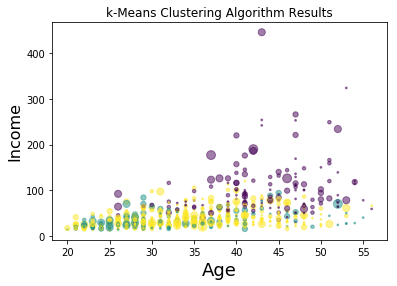

In [77]:
# Visualize 2D clusters
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means_labels.astype(np.float), alpha=0.5)

plt.title("k-Means Clustering Algorithm Results")
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

In [78]:
# Visualize 3D clusters
@interact
def plot_3d(elevation=(0, 90, 10), azim=(0, 360, 10)):
    fig = plt.figure(1, figsize=(8, 6))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elevation, azim=azim)

    plt.cla()
    ax.set_xlabel('Education')
    ax.set_ylabel('Age')
    ax.set_zlabel('Income')

    ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= k_means_labels.astype(np.float))

interactive(children=(IntSlider(value=40, description='elevation', max=90, step=10), IntSlider(value=180, desc…

#### Hierarchical Clustering

Hierarchical clustering algorithms group daughter nodes into clusters based on their similarity (closeness). There are two types of hierarchical clustering: divisive (top-down) and agglomerative (bottom-up). 

**Agglomerative Clustering**

The agglomerative approach builds a hierarchy in the form of a dendrogram by progressively merging nearby elements into clusters.

* Create n clusters, each comprised of one data point.
* Compute the distance matrix, which contains the distance from each point to every other point in the dataset.
* Merge the two elements that are closest to each other to form a cluster. 
* Re-compute the distrance matrix.
* Repeat the process of merging the nearest elements (whether individual points or clusters) until only a single cluster remains.

When computing the distance between clusters, it is common to use one of the following linkage criteria:

* **Single-linkage clustering:** the minimum distance between clusters
* **Complete-linkage clustering:** the maximum distance between clusters
* **Average-linkage clustering:** the average distance between all points in the clusters
* **Centroid-linkage clustering:** the distance between the centroids of the clusters
* **Ward clustering:** the sum of squared distances between all points in the clusters

The algorithm will merge pairs of clusters that minimize the linkage criterion.

Hierarchical clustering is easy to implement and produces visual output in the form of a dendrogram. It is also convenient because it does not require the user specify number of clusters. However, the heirarchical algorithms tend to be slow and cannot be reversed through previous stages of clustering. In comparison with k-means, which tends to be more efficient, hierarchical clustering gives more than one partitioning depending on the desired resolution and always generates the same result.

**Dendrograms**, which are the visual ouput produced from hierarchical clustering, are tree-like structures that represent the different stages of cluster amalgamation. Each merge is represented by a horizontal line. As the vertical height (or y-value) of each horizontal line increases, the similarity of merged clusters increases.

In [79]:
# Generate random cluster data
X1, y1 = make_blobs(n_samples=50, centers=[[1,0],[3,2],[-2,-1],[2,-2]], cluster_std=1)

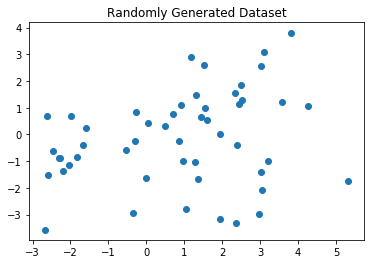

In [80]:
# Visualize the data
plt.scatter(X1[:,0], X1[:,1])

plt.title("Randomly Generated Dataset")
plt.show()

In [81]:
# Fit agglomerative algorithm
agglom = AgglomerativeClustering(n_clusters=4, linkage="average")
agglom.fit(X1, y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

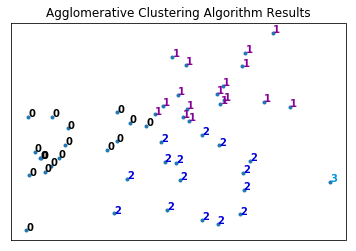

In [82]:
# Plot results
for i in range(len(agglom.labels_)):
    plt.text(X1[i,0], X1[i,1], str(agglom.labels_[i]), 
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={"weight":"bold","size":10})

plt.xticks([])    
plt.yticks([])

plt.title("Agglomerative Clustering Algorithm Results")
plt.scatter(X1[:,0], X1[:,1], marker='.')
plt.show()

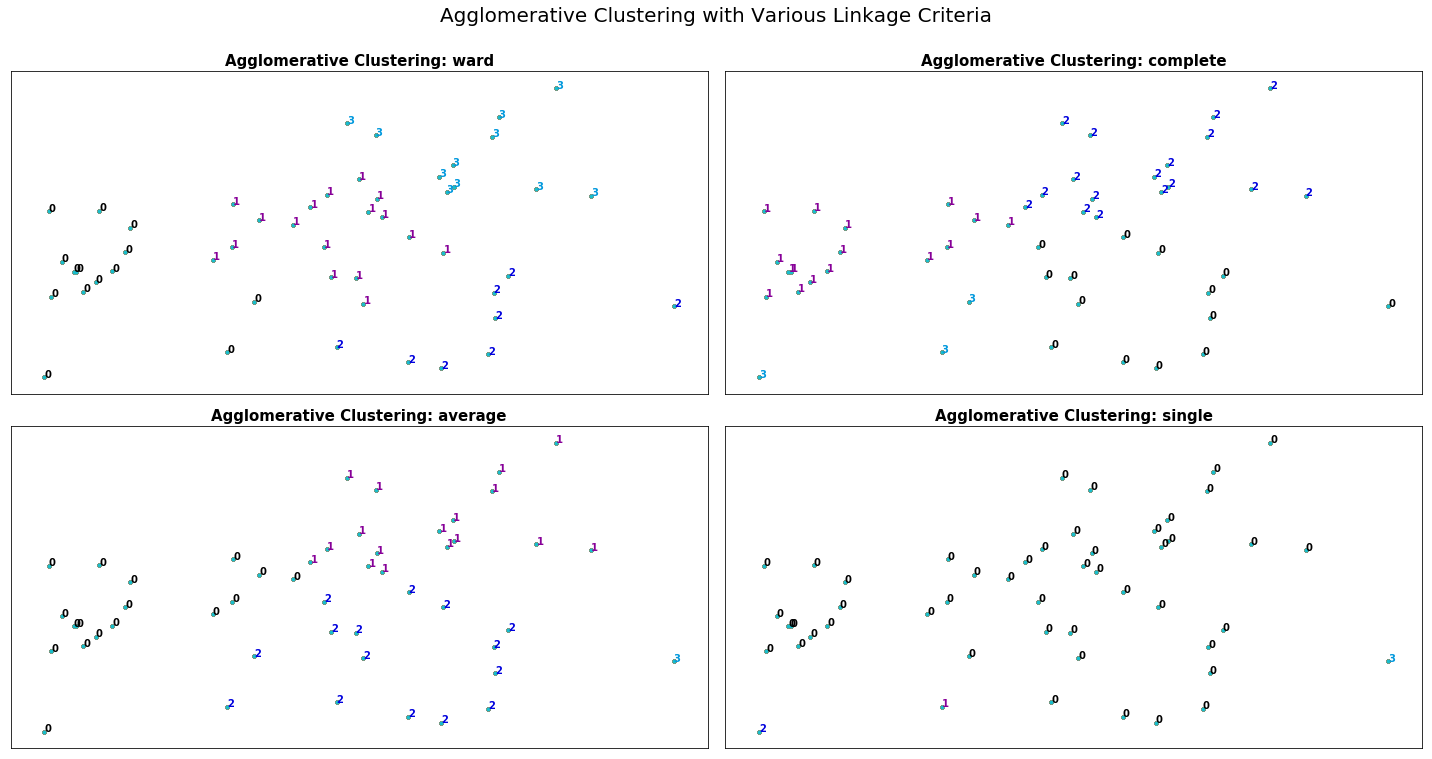

In [83]:
# Illustrate the effect of different linkage criteria
linkages = ['ward', 'complete', 'average', 'single']

fig = plt.figure(figsize=(20,10))

for i, linkage in enumerate(linkages):
    ax = fig.add_subplot(2,2,i+1)
    agglom = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    agglom.fit(X1, y1)
    
    for j in range(len(agglom.labels_)):
        plt.text(X1[j,0], X1[j,1], str(agglom.labels_[j]), 
                     color=plt.cm.nipy_spectral(agglom.labels_[j] / 10.),
                     fontdict={"weight":"bold","size":10})
        plt.xticks([])    
        plt.yticks([])
        plt.title("Agglomerative Clustering: " + linkage, fontdict={"weight":"bold","size":15})
        plt.scatter(X1[:,0], X1[:,1], marker='.')

plt.suptitle("Agglomerative Clustering with Various Linkage Criteria", y=1.05, fontsize=20)
plt.tight_layout()
plt.show()

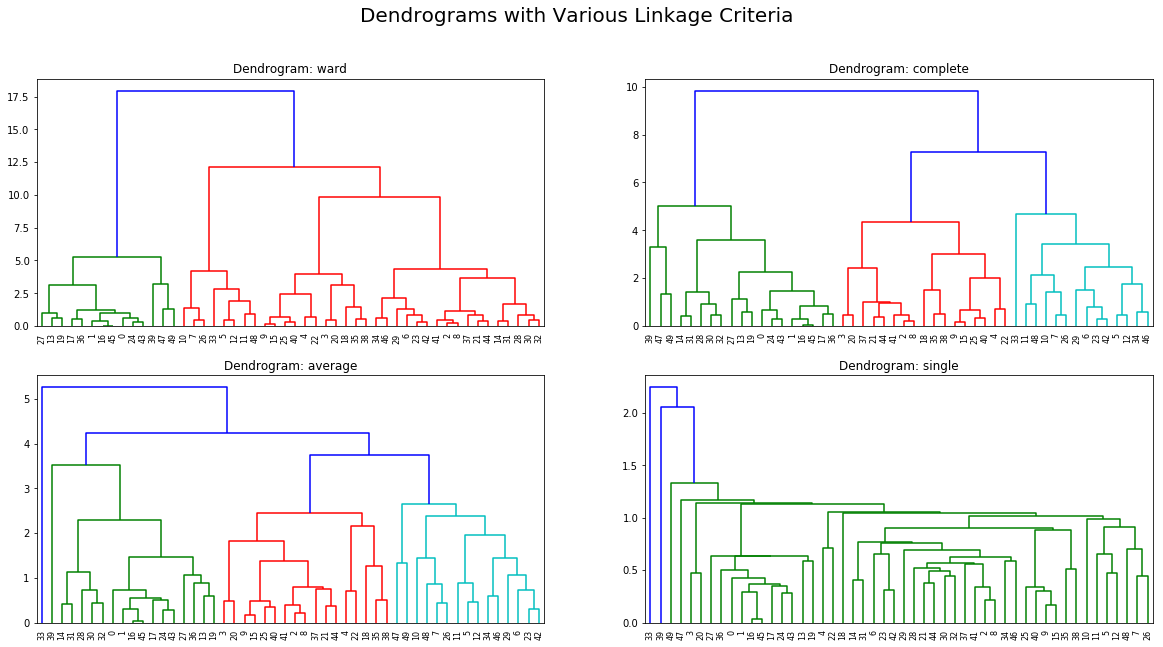

In [84]:
# View dendrogram
# Create distance matrix

fig = plt.figure(figsize=(20,10))

for i, linkage in enumerate(linkages):
    fig.add_subplot(2,2,i+1)
    dist_matrix = distance_matrix(X1, X1)

    # Convert the redundant n*n square matrix form into a condensed nC2 array as required by hierarchy.linkage()
    distArray = ssd.squareform(dist_matrix)

    Z = hierarchy.linkage(distArray, linkage)
    dendro = hierarchy.dendrogram(Z)
    plt.title("Dendrogram: " + linkage)

plt.suptitle("Dendrograms with Various Linkage Criteria", fontsize=20)
plt.show()

In [85]:
# Another hierarchical clustering example - using scipy
cars_df = pd.read_csv("assets/cars_clus.csv")
cars_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [86]:
# Clean the data
print("Size before cleaning:", cars_df.shape)
cars_df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = cars_df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
cars_df = cars_df.dropna()
cars_df = cars_df.reset_index()
print("Size before cleaning:", cars_df.shape)

Size before cleaning: (159, 16)
Size before cleaning: (117, 17)


In [87]:
# Select features of interest
featureset = cars_df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [91]:
# Normalize feature set
x = featureset.values
feature_mtx = MinMaxScaler().fit_transform(x)

In [94]:
# Create the distance matrix
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [101]:
# Create the hierarchy
distArray = ssd.squareform(dist_matrix) # Convert matrix into vector
Z = hierarchy.linkage(distArray, 'complete')

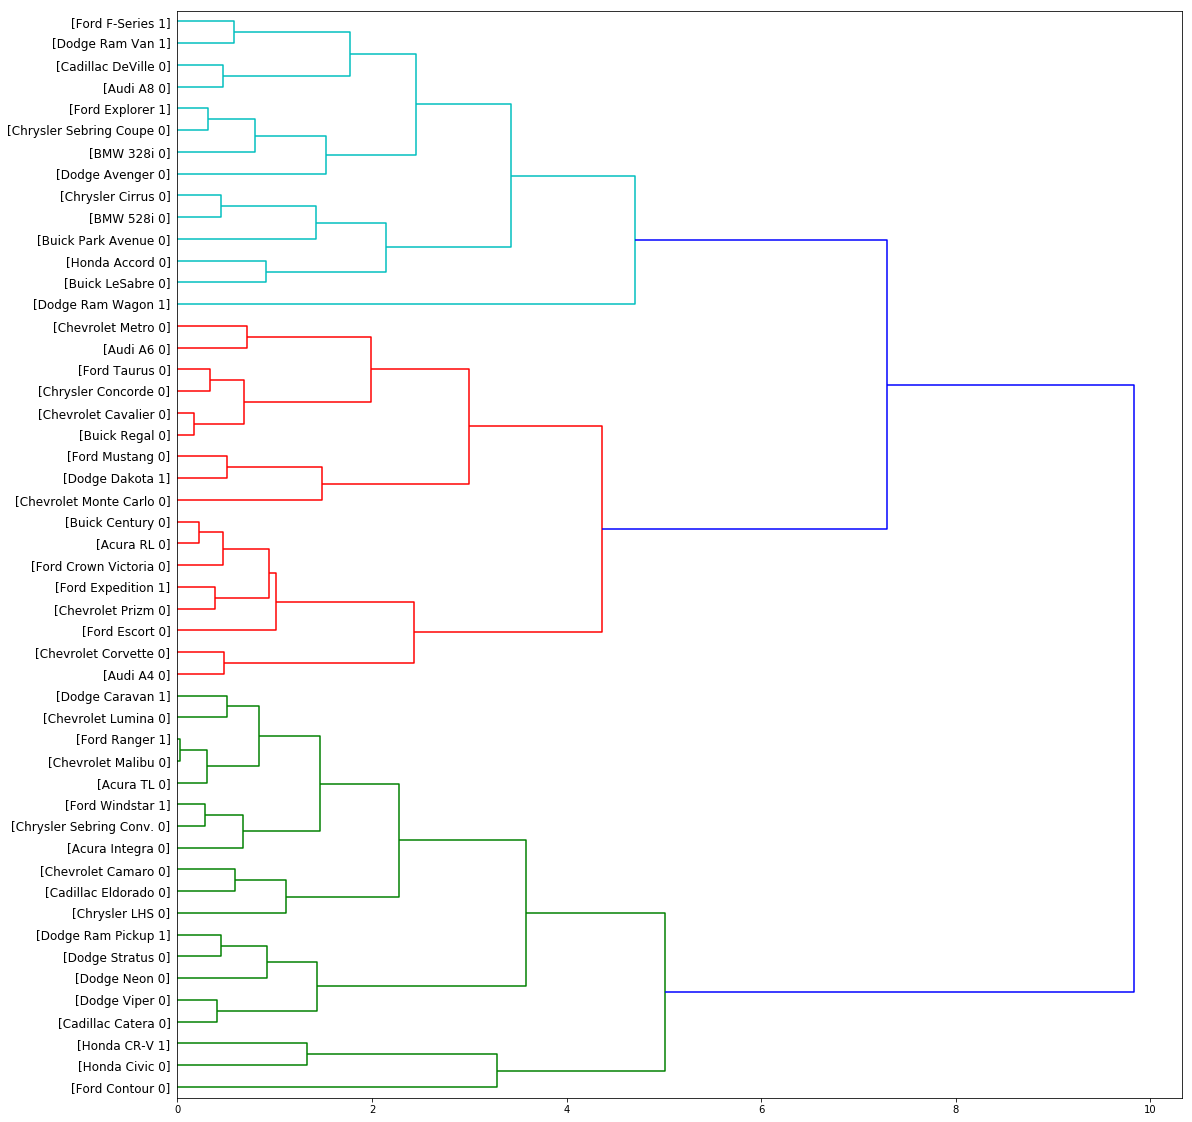

In [103]:
# Plot the dendrogram
fig = pylab.figure(figsize=(18,20))
def llf(id):
    return '[%s %s %s]' % (cars_df['manufact'][id], cars_df['model'][id], int(float(cars_df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [106]:
# Or, determine the number of clusters directly
max_depth = 3
clusters_max_depth = fcluster(Z, max_depth, criterion='distance')

k = 5
clusters = fcluster(Z, k, criterion='maxclust')

clusters_max_depth, clusters

(array([4, 4, 5, 5, 6, 8, 8, 7, 5, 6, 7, 7, 8, 4, 3, 6, 4, 4, 6, 4, 5, 5,
        6, 8, 4, 6, 7, 4, 3, 8, 3, 3, 3, 9, 8, 6, 4, 5, 6, 2, 6, 5, 8, 4,
        5, 4, 8, 1, 7, 1], dtype=int32),
 array([2, 2, 3, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 2, 2, 3, 2, 2, 3, 2, 3, 3,
        3, 4, 2, 3, 4, 2, 2, 4, 2, 2, 2, 5, 4, 3, 2, 3, 3, 1, 3, 3, 4, 2,
        3, 2, 4, 1, 4, 1], dtype=int32))

In [108]:
# Another clustering example, this time using Scikit-learn
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(feature_mtx)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [111]:
cars_df["cluster_"] = agglom.labels_
cars_df.head()

,index,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


In [143]:
subset.dtypes

index          int64
manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
cluster_       int64
dtype: object

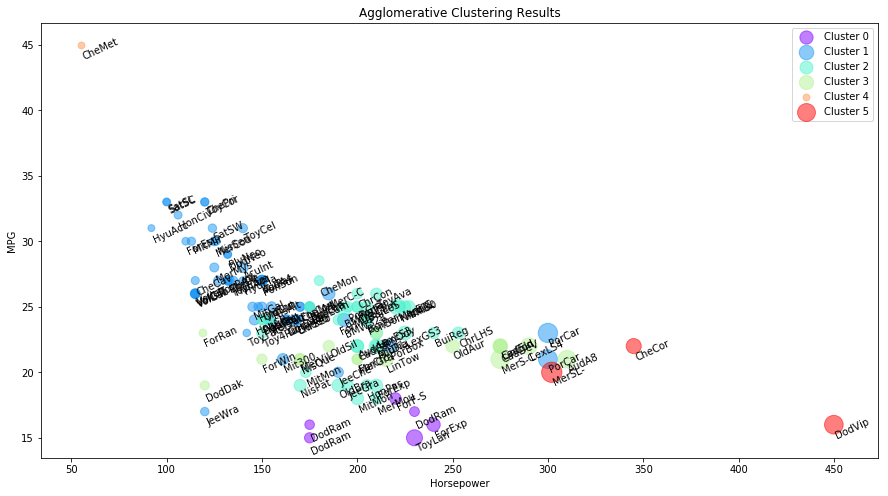

In [162]:
n_clusters = max(agglom.labels_) + 1
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(15, 8))

for color, label in zip(colors, cluster_labels):
    subset = cars_df[cars_df["cluster_"] == label]
    
    for s in subset.index:
        plt.text(subset["horsepow"][s],subset["mpg"][s],
                 subset["manufact"][s][0:3]+subset["model"][s][0:3], rotation=25)

    plt.scatter(subset["horsepow"], subset["mpg"], s=subset["price"]*5, 
                label="Cluster "+str(label), color=color, alpha=0.5)

plt.legend()
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Agglomerative Clustering Results")
plt.show()

In [170]:
# View cluster count split by cars (type = 0) and trucks (type = 1)
cars_df.groupby(["cluster_", "type"])["cluster_"].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [171]:
grouped = cars_df.groupby(["cluster_", "type"])["horsepow", "engine_s", "mpg", "price"].mean()
grouped

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

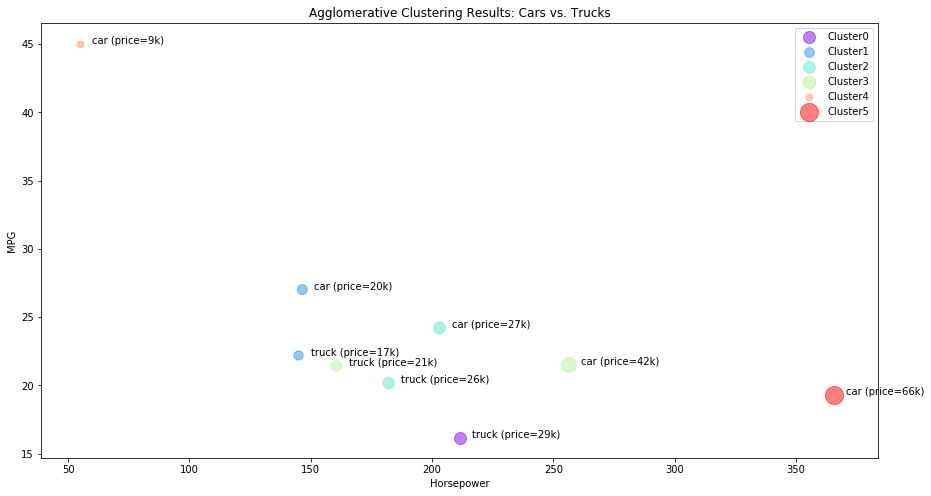

In [201]:
n_clusters = max(agglom.labels_) + 1
cluster_labels = list(range(0, n_clusters))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(15, 8))

for color, label in zip(colors, cluster_labels):
    subset = grouped.loc[label]
    
    for s in subset.index:
        car_type = "car"
        if s == 1:
            car_type = "truck"
        plt.text(subset.loc[s][0]+5, subset.loc[s][2],
                 car_type+" (price="+str(int(subset.loc[s][3]))+"k)")
    
    plt.scatter(subset["horsepow"], subset["mpg"], s=subset["price"]*5,
                label="Cluster"+str(label),color=color, alpha=0.5)

plt.legend()
plt.ylabel("MPG")
plt.xlabel("Horsepower")
plt.title("Agglomerative Clustering Results: Cars vs. Trucks")
plt.show()

#### DBSCAN

One downfall of partitioning algorithms such as k-means is that there is no concept of outliers- all points are assigned to a cluster even if, in reality, they do not belong in one, which in turn affects the position of cluster centroids. DBSCAN, or Density Based Spatial Clustering of Applications with Noise, attempts to solve the issue of outliers.

DBSCAN works on the idea that a point belonging to a cluster should be close to other points in that same cluster. The algorithm defines "core" points, which are those that are surrounded by a minimum of n points within radius r, and "support" points, which are those lacking the minimum of n neighbors but that are within r radius of a "core" point. Points that are neither "core" nor "support" are termed "outliers". To create clusters, DBSCAN then connects neighboring "core" points and their bordering "support" points.

The benefits of DBSCAN are that we do not need to specify the number of clusters, it is robust to outliers, it can create arbitrarily-sized clusters and it can identify clusters that are completely surrounded by other clusters.